<a href="https://colab.research.google.com/github/NIKHIL4053/FDI-Data/blob/main/FDI_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("FDI data.csv")

# Display the first few rows of the dataset
print(data.head())


                     Sector  2000-01  2001-02  2002-03  2003-04  2004-05  \
0  METALLURGICAL INDUSTRIES    22.69    14.14    36.61     8.11   200.38   
1                    MINING     1.32     6.52    10.06    23.48     9.92   
2                     POWER    89.42   757.44    59.11    27.09    43.37   
3   NON-CONVENTIONAL ENERGY     0.00     0.00     1.70     4.14     1.27   
4           COAL PRODUCTION     0.00     0.00     0.00     0.04     0.00   

   2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  2011-12  2012-13  \
0   149.13   169.94  1175.75   959.94   419.88  1098.14  1786.14  1466.23   
1     7.40     6.62   444.36    34.16   174.40    79.51   142.65    57.89   
2    72.69   157.15   988.68   907.66  1271.79  1271.77  1652.38   535.68   
3     1.35     2.44    58.82   125.88   622.52   214.40   452.17  1106.52   
4     9.14     1.30    14.08     0.22     0.00     0.00     0.00     0.00   

   2013-14  2014-15  2015-16  2016-17  
0   567.63   359.34   456.31  1440.18  


<ipython-input-2-736cab896294>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


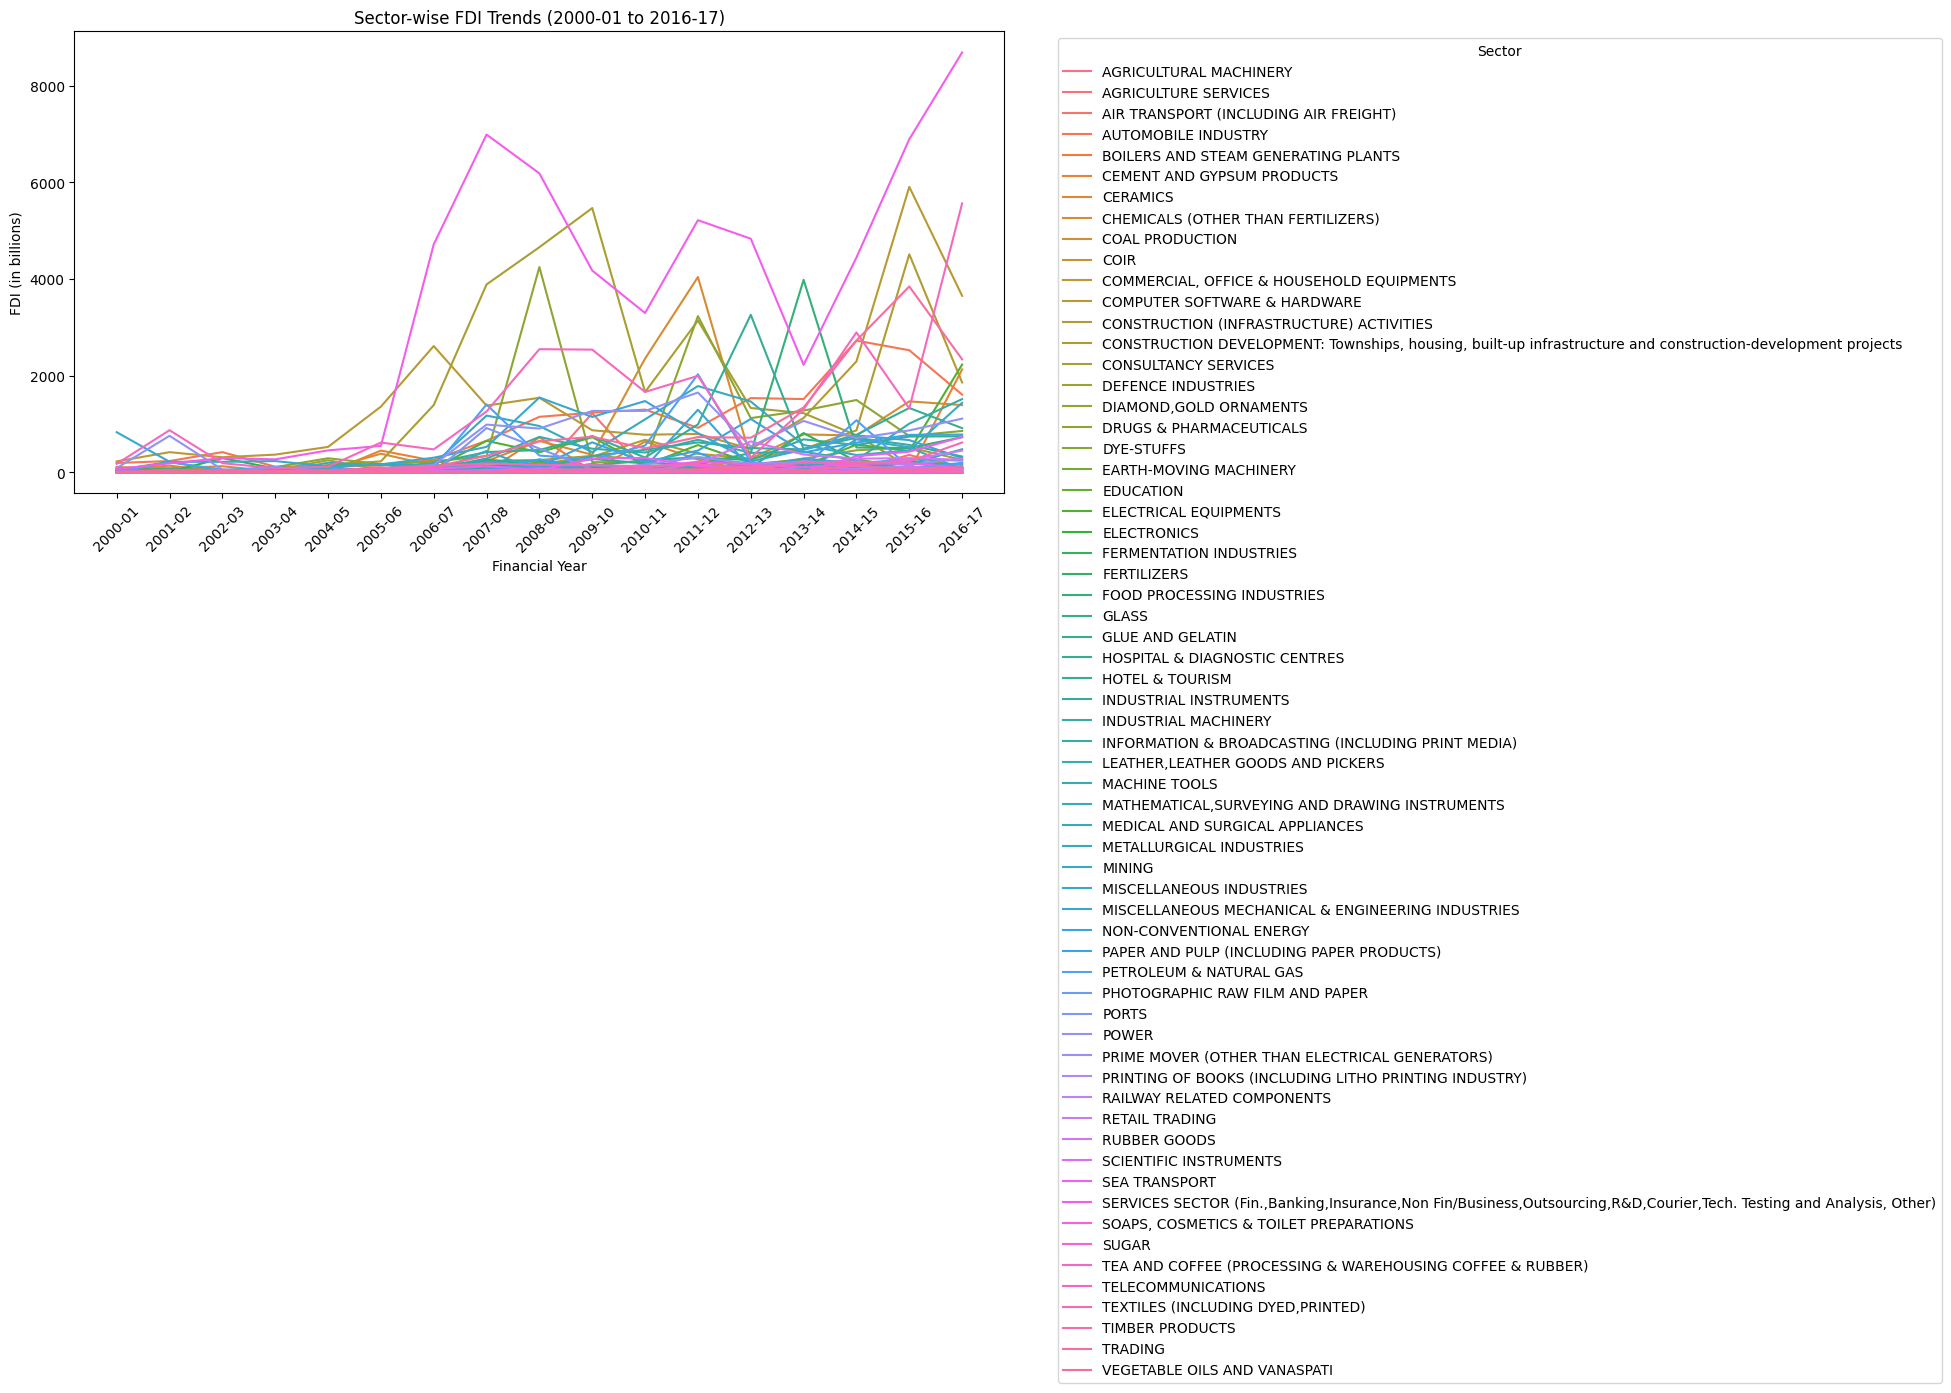

In [2]:
# Group by sector and calculate total FDI for each sector over the years
sector_wise_fdi = data.groupby('Sector').sum()

# Plotting sector-wise FDI trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=sector_wise_fdi.T, dashes=False)
plt.title('Sector-wise FDI Trends (2000-01 to 2016-17)')
plt.xlabel('Financial Year')
plt.ylabel('FDI (in billions)')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-3-b2f3397f110a>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


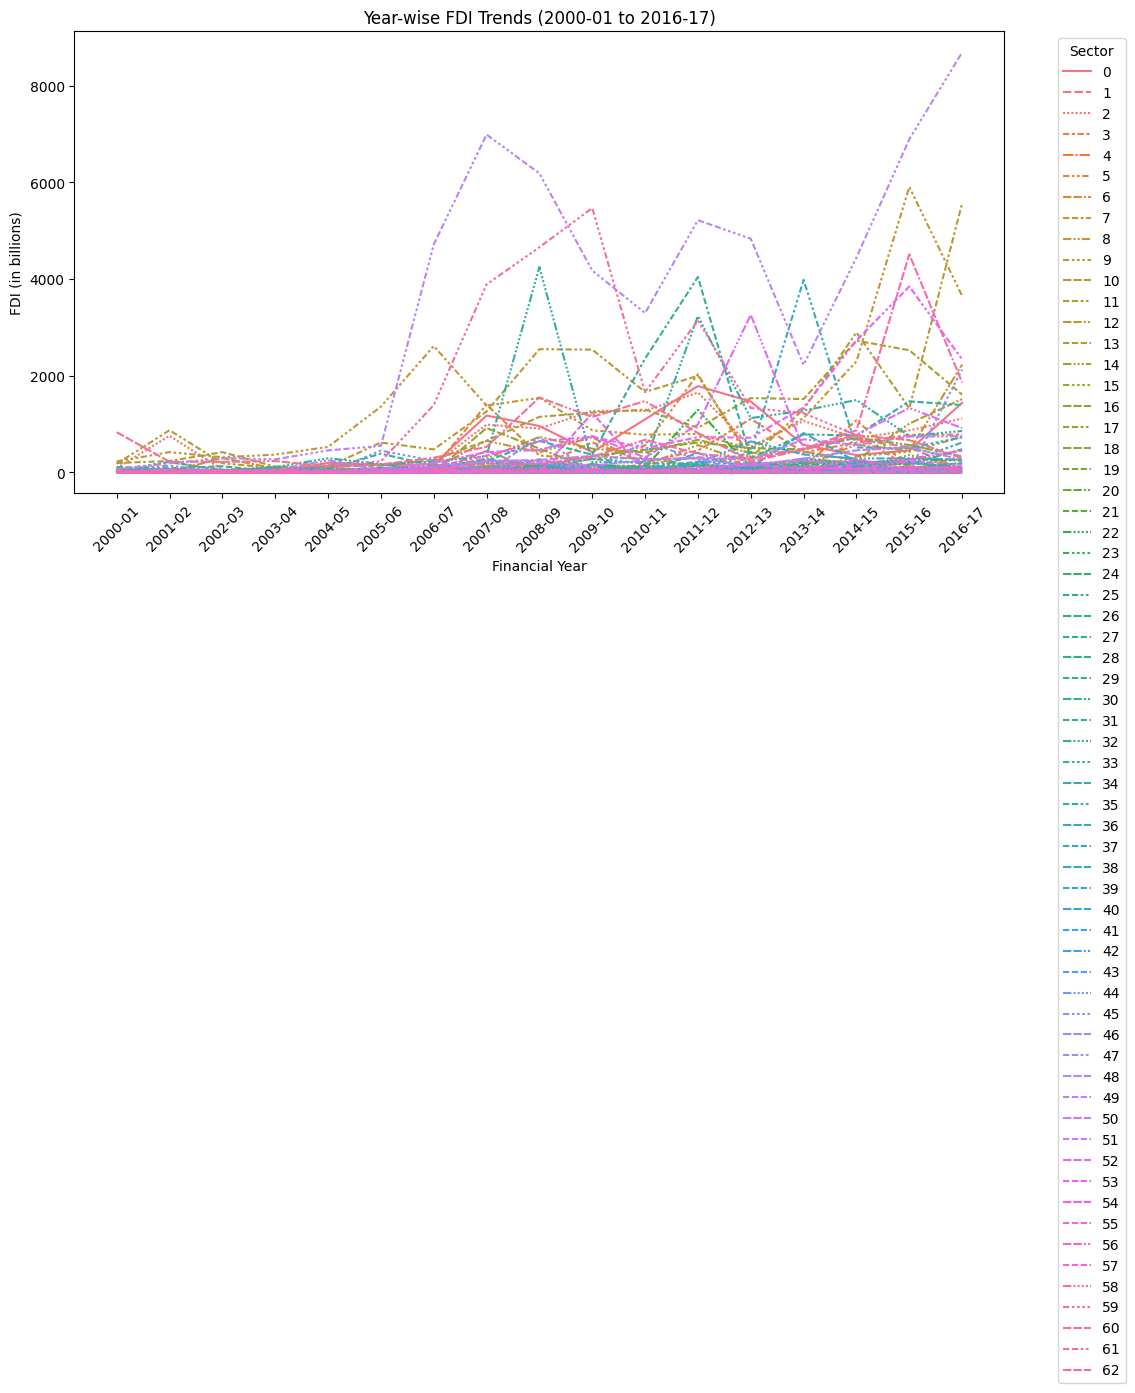

In [3]:
# Plotting year-wise FDI trends across all sectors
plt.figure(figsize=(12, 6))
sns.lineplot(data=data.drop('Sector', axis=1).T)
plt.title('Year-wise FDI Trends (2000-01 to 2016-17)')
plt.xlabel('Financial Year')
plt.ylabel('FDI (in billions)')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


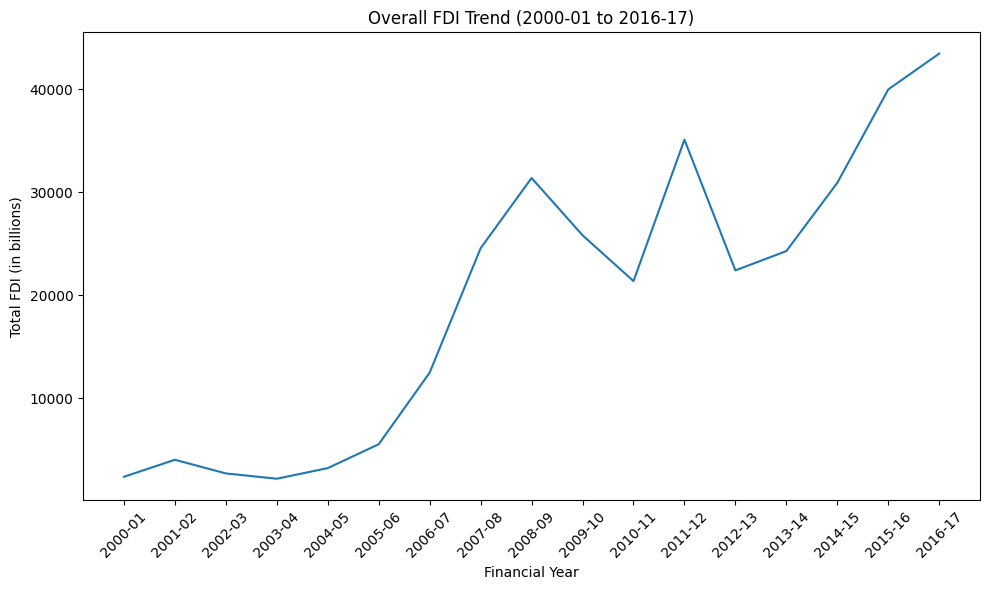

In [4]:
# Calculate total FDI for each year
total_fdi_yearwise = data.drop('Sector', axis=1).sum(axis=0)

# Plotting overall FDI trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=total_fdi_yearwise.index, y=total_fdi_yearwise.values)
plt.title('Overall FDI Trend (2000-01 to 2016-17)')
plt.xlabel('Financial Year')
plt.ylabel('Total FDI (in billions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-5-8a66dee23184>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


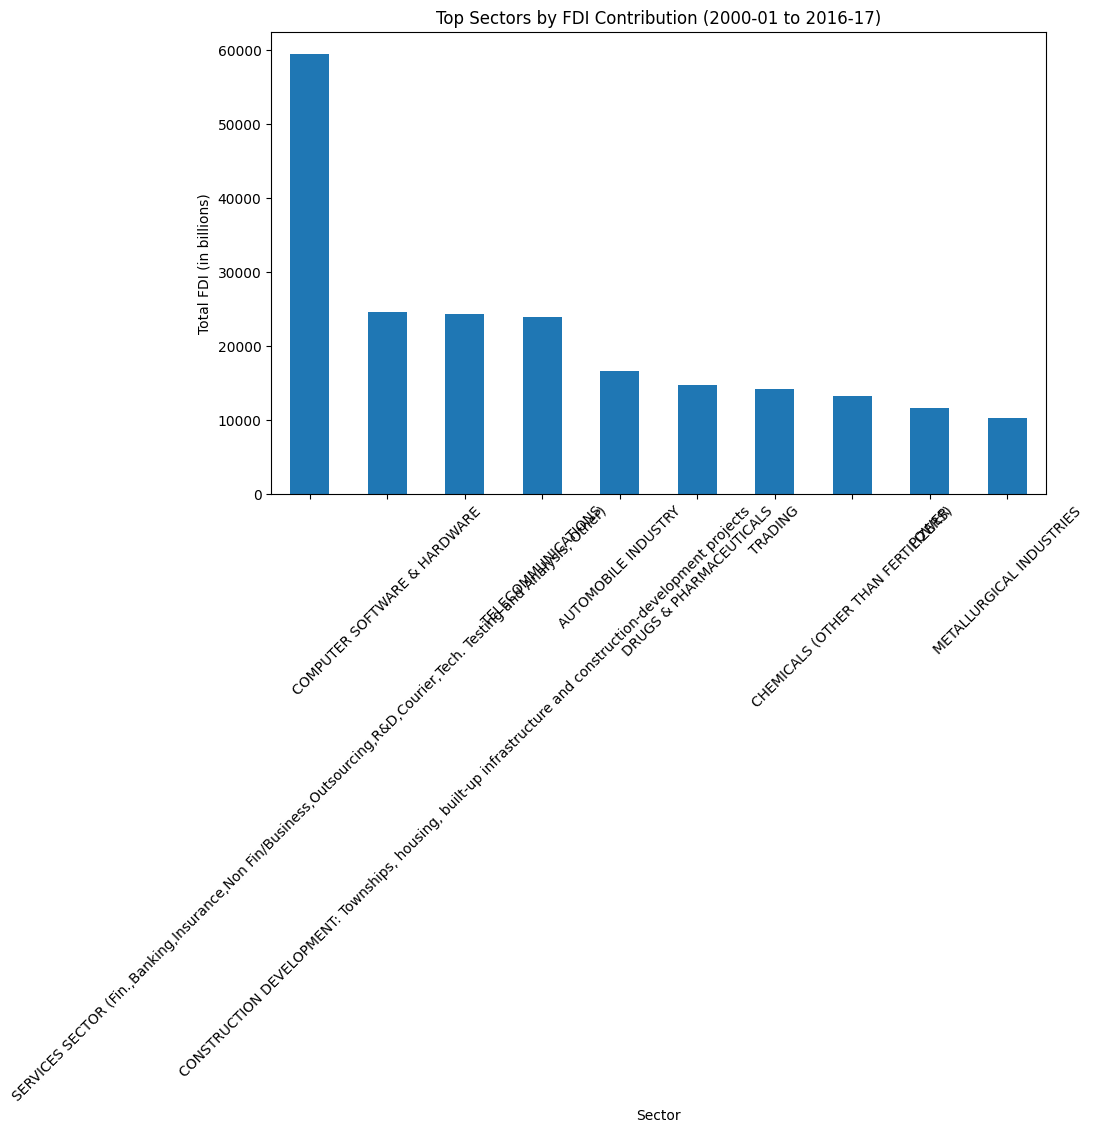

In [5]:
# Calculate total FDI for each sector
total_fdi_sectorwise = data.groupby('Sector').sum().sum(axis=1)

# Plotting top sectors by FDI contribution
top_sectors = total_fdi_sectorwise.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_sectors.plot(kind='bar')
plt.title('Top Sectors by FDI Contribution (2000-01 to 2016-17)')
plt.xlabel('Sector')
plt.ylabel('Total FDI (in billions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


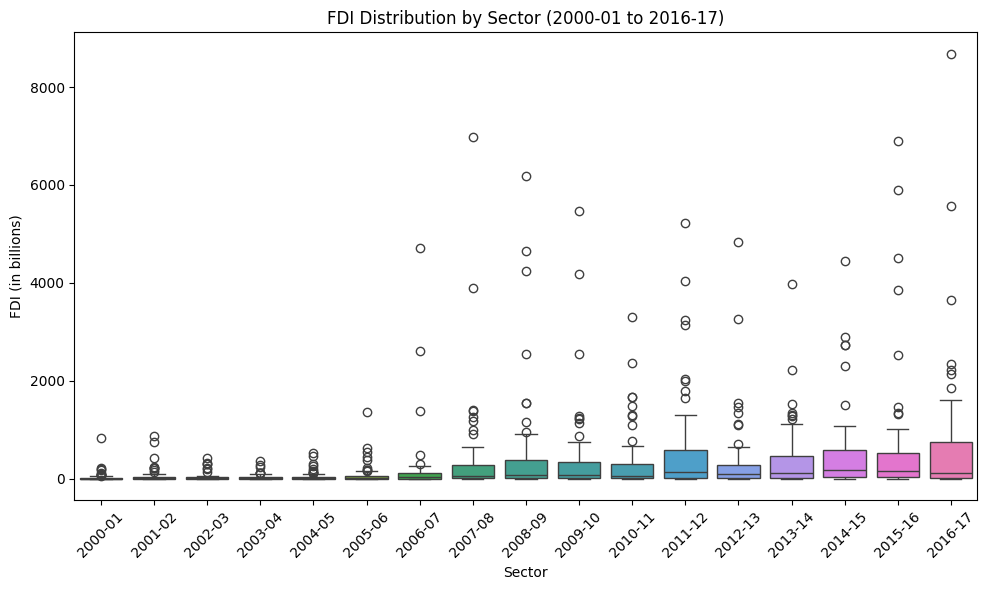

In [6]:
# Plotting FDI distribution by sector
plt.figure(figsize=(10, 6))
sns.boxplot(data=sector_wise_fdi)
plt.title('FDI Distribution by Sector (2000-01 to 2016-17)')
plt.xlabel('Sector')
plt.ylabel('FDI (in billions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


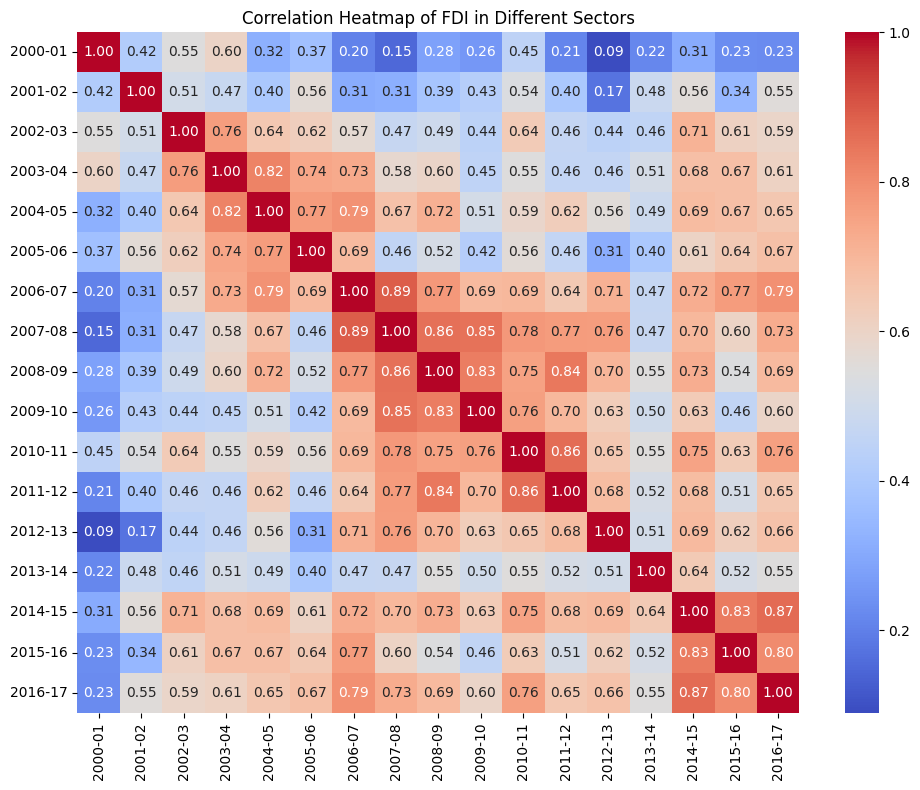

In [7]:
# Calculate correlation matrix
correlation_matrix = sector_wise_fdi.corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of FDI in Different Sectors')
plt.tight_layout()
plt.show()


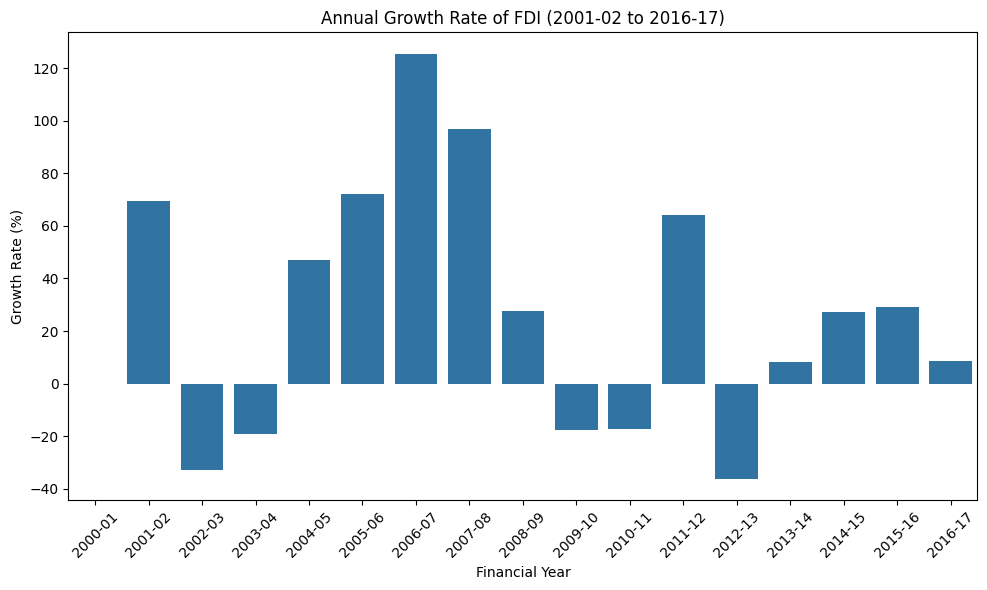

In [8]:
# Calculate annual growth rate
annual_growth_rate = total_fdi_yearwise.pct_change() * 100

# Plotting annual growth rate
plt.figure(figsize=(10, 6))
sns.barplot(x=annual_growth_rate.index, y=annual_growth_rate.values)
plt.title('Annual Growth Rate of FDI (2001-02 to 2016-17)')
plt.xlabel('Financial Year')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-9-6cc87e049554>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


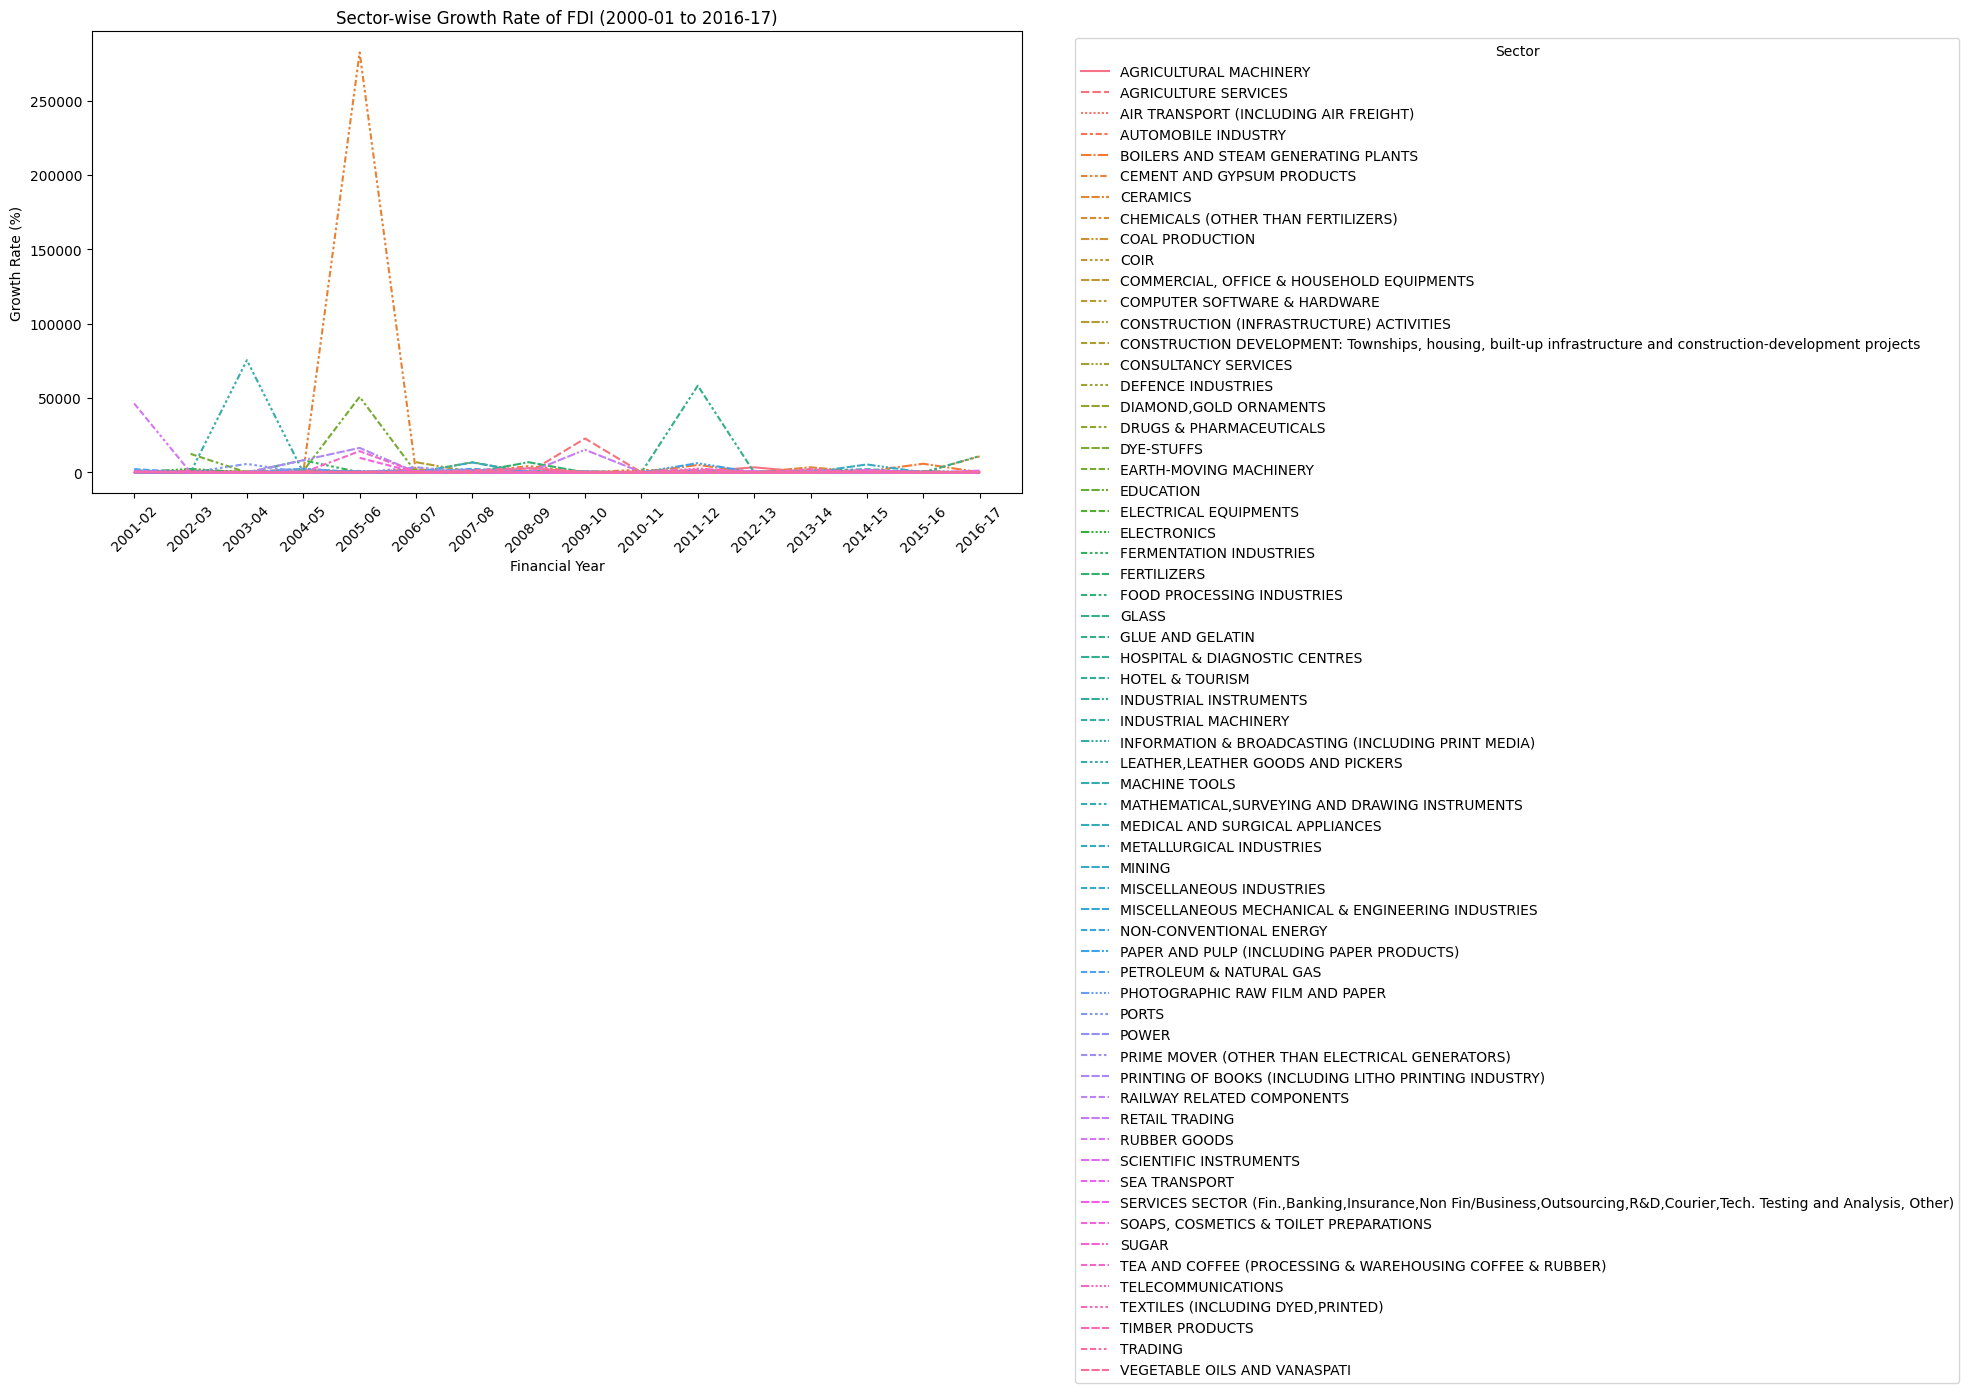

In [9]:
# Calculate sector-wise growth rate
sector_wise_growth_rate = sector_wise_fdi.pct_change(axis=1) * 100

# Plotting sector-wise growth rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=sector_wise_growth_rate.T)
plt.title('Sector-wise Growth Rate of FDI (2000-01 to 2016-17)')
plt.xlabel('Financial Year')
plt.ylabel('Growth Rate (%)')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


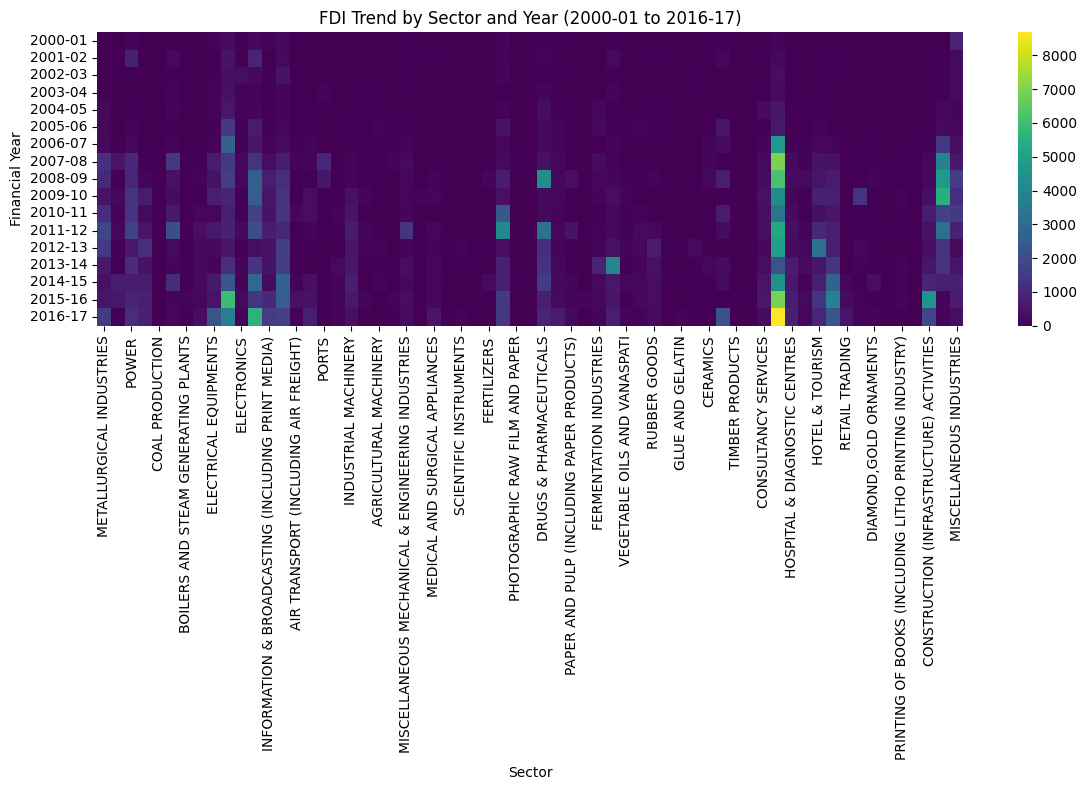

In [10]:
# Plotting FDI trend by sector and year
plt.figure(figsize=(12, 8))
sns.heatmap(data.set_index('Sector').T, cmap='viridis')
plt.title('FDI Trend by Sector and Year (2000-01 to 2016-17)')
plt.xlabel('Sector')
plt.ylabel('Financial Year')
plt.tight_layout()
plt.show()
